In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Create CSVs for Data Loading

In [13]:
data_path = '../mendeley_xray/'
train_path_no = data_path + 'train/NORMAL/'
train_path_pn = data_path + 'train/PNEUMONIA/'
test_path_no = data_path + 'test/NORMAL/'
test_path_pn = data_path + 'test/PNEUMONIA/'

In [24]:
train_no_files = [train_path_no+file for file in os.listdir(train_path_no) if not file.startswith('.')]
train_pn_files = [train_path_pn+file for file in os.listdir(train_path_pn) if not file.startswith('.')]
test_no_files = [test_path_no+file for file in os.listdir(test_path_no) if not file.startswith('.')]
test_pn_files = [test_path_pn+file for file in os.listdir(test_path_pn) if not file.startswith('.')]

In [29]:
train_pn_files[0].split('/')

['..', 'mendeley_xray', 'train', 'PNEUMONIA', 'BACTERIA-4038442-0001.jpeg']

In [25]:
assert len(train_no_files) + len(train_pn_files) +  len(test_no_files) + len(test_pn_files) == 5856

In [48]:
# train_df = pd.DataFrame(columns=['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
#                                 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
#                                'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 
#                                 'Pneumothorax','Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'])
# test_df = pd.DataFrame(columns=['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
#                                 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
#                                'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 
#                                 'Pneumothorax','Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices'])

In [30]:
def create_row(file_name):
    
    finding = file_name.split('/')[3]
    if finding == 'NORMAL':
        row = {'Path': file_name[3:], 'No Finding':1, 'Enlarged Cardiomediastinum':0, 'Cardiomegaly':0, 'Lung Opacity':0,
                               'Lung Lesion':0, 'Edema':0, 'Consolidation':0, 'Pneumonia':0, 'Atelectasis':0, 
                                'Pneumothorax':0,'Pleural Effusion':0, 'Pleural Other':0, 'Fracture':0, 'Support Devices':0}
    elif finding == 'PNEUMONIA':
        row = {'Path': file_name[3:], 'No Finding':0, 'Enlarged Cardiomediastinum':0, 'Cardiomegaly':0, 'Lung Opacity':0,
                               'Lung Lesion':0, 'Edema':0, 'Consolidation':0, 'Pneumonia':1, 'Atelectasis':0, 
                                'Pneumothorax':0,'Pleural Effusion':0, 'Pleural Other':0, 'Fracture':0, 'Support Devices':0}
    else:
        print('Something went wrong')
        
    return row

In [39]:
train_files = train_no_files + train_pn_files
for file in train_files:
    row = create_row(file)
    train_df = train_df.append(row, ignore_index=True)

train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,mendeley_xray/train/NORMAL/NORMAL-2552119-0002...,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,mendeley_xray/train/NORMAL/NORMAL-7298141-0001...,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,mendeley_xray/train/NORMAL/NORMAL-3411116-0002...,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mendeley_xray/train/NORMAL/NORMAL-1619233-0001...,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mendeley_xray/train/NORMAL/NORMAL-7327513-0001...,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
test_files = test_no_files + test_pn_files
for file in test_files:
    row = create_row(file)
    test_df = test_df.append(row, ignore_index=True)

test_df.tail()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
619,mendeley_xray/test/PNEUMONIA/BACTERIA-9242636-...,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0
620,mendeley_xray/test/PNEUMONIA/BACTERIA-1602272-...,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0
621,mendeley_xray/test/PNEUMONIA/VIRUS-4360206-000...,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0
622,mendeley_xray/test/PNEUMONIA/VIRUS-3746644-000...,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0
623,mendeley_xray/test/PNEUMONIA/VIRUS-4190128-000...,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
train_df.to_csv('../mendeley_xray/train_mendeley.csv', index=False)

In [50]:
test_df.to_csv('../mendeley_xray/test_mendeley.csv', index=False)

In [52]:
assert len(train_df) + len(test_df) == 5856

### Label Distribution

In [2]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=13) #fontsize of the x and y labels
plt.rc('xtick', labelsize=13) #fontsize of the x tick labels
plt.rc('ytick', labelsize=13) #fontsize of the y tick labels
plt.rc('legend', fontsize=13) #fontsize of the legend
cmap = plt.cm.get_cmap('cividis')

In [3]:
img_path='../../visualization/data/data_pretty/'

In [4]:
train_path = './mendeley_xray/train_mendeley.csv'
train_df = pd.read_csv(train_path)
test_path = './mendeley_xray/test_mendeley.csv'
test_df = pd.read_csv(test_path)

In [5]:
print(f"Number of images: {len(test_df)+len(train_df)}")
print(f"Number of training images: {len(train_df)}")
print(f"Number of test images: {len(test_df)}")

Number of images: 5856
Number of training images: 5232
Number of test images: 624


In [18]:
pos = train_df[train_df == 1.0].iloc[:,[5,12]].count()
neg = train_df[train_df == 0].iloc[:,[5,12]].count()

In [22]:
1349/5856

0.2303620218579235

No Finding    1349
Pneumonia     3883
dtype: int64


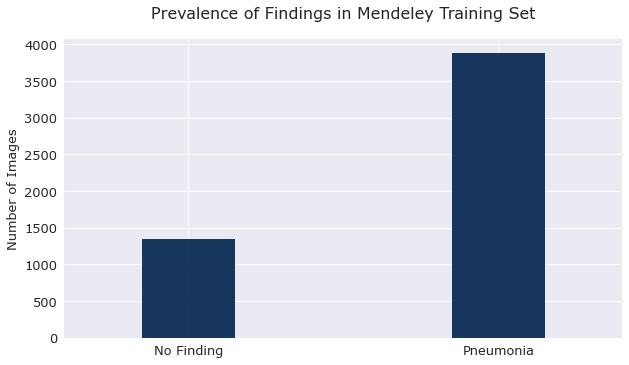

In [19]:
fig, ax = plt.subplots(facecolor='white', figsize=(10,5.5))
pos.plot(kind='bar', colormap='cividis', alpha=0.9, width=0.3)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('Prevalence of Findings in Mendeley Training Set', pad=20)
# plt.savefig(img_path+'mendeley_prevalence_train.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(pos)

In [20]:
pos = test_df[test_df == 1.0].iloc[:,[5,12]].count()
neg = test_df[test_df == 0].iloc[:,[5,12]].count()

No Finding    234
Pneumonia     390
dtype: int64


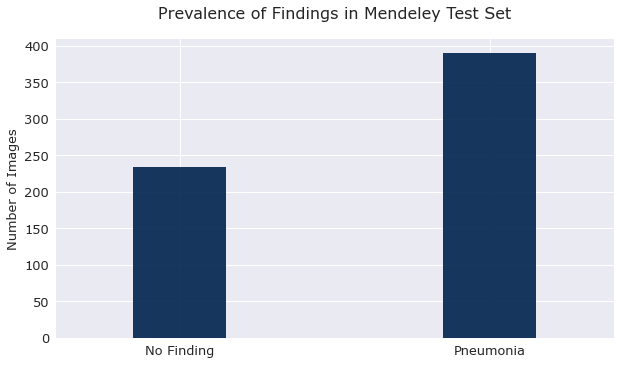

In [21]:
fig, ax = plt.subplots(facecolor='white', figsize=(10,5.5))
pos.plot(kind='bar', colormap='cividis', alpha=0.9, width=0.3)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('Prevalence of Findings in Mendeley Test Set', pad=20)
plt.savefig(img_path+'mendeley_prevalence_test.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(pos)

### Data Split

Ten images are samples randomly from the training set for each split. All splits include at least two "No Finding" labels. Random seeds are: 206, 207, 209.

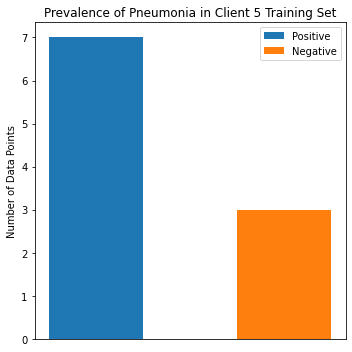

In [131]:
train_split = pd.read_csv('../mendeley_xray/client5/client_train.csv')

pos = train_split[train_split == 1.0].iloc[:,[12]].count()
neg = train_split[train_split == 0].iloc[:,[12]].count()

X = list(pos.index)
X_axis = np.arange(len(pos))

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

plt.bar(X_axis, pos, 0.01, label = 'Positive')
plt.bar(X_axis+0.02, neg, -0.01, label='Negative')
  
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.ylabel("Number of Data Points")
plt.title("Prevalence of Pneumonia in Client 5 Training Set")
plt.legend(loc='upper right')

plt.tight_layout()

# f.savefig(img_path+'client_mendeley_training.png')

plt.plot()
plt.show()

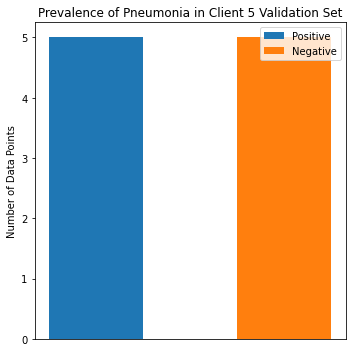

In [132]:
val_split = pd.read_csv('../mendeley_xray/client5/client_val.csv')

pos = val_split[val_split == 1.0].iloc[:,[12]].count()
neg = val_split[val_split == 0].iloc[:,[12]].count()

X = list(pos.index)
X_axis = np.arange(len(pos))

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

plt.bar(X_axis, pos, 0.01, label = 'Positive')
plt.bar(X_axis+0.02, neg, -0.01, label='Negative')
  
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.ylabel("Number of Data Points")
plt.title("Prevalence of Pneumonia in Client 5 Validation Set")
plt.legend(loc='upper right')

plt.tight_layout()

# f.savefig(img_path+'client_mendeley_val.png')

plt.plot()
plt.show()

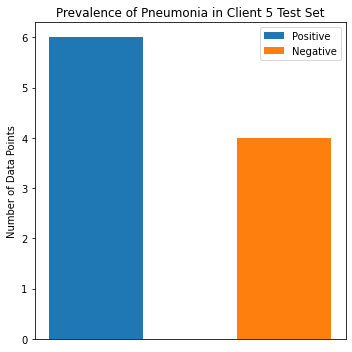

In [133]:
test_split = pd.read_csv('../mendeley_xray/client5/client_test.csv')

pos = test_split[test_split == 1.0].iloc[:,[12]].count()
neg = test_split[test_split == 0].iloc[:,[12]].count()

X = list(pos.index)
X_axis = np.arange(len(pos))

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

plt.bar(X_axis, pos, 0.01, label = 'Positive')
plt.bar(X_axis+0.02, neg, -0.01, label='Negative')
  
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.ylabel("Number of Data Points")
plt.title("Prevalence of Pneumonia in Client 5 Test Set")
plt.legend(loc='upper right')

plt.tight_layout()

# f.savefig(img_path+'client_mendeley_test.png')

plt.plot()
plt.show()